In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

np.sign([-5, -1, 0, 1, 10])

array([-1, -1,  0,  1,  1])

In [21]:
c = True
d = False
a = int(c)
b = int(d)
print (a, b)

1 0


In [22]:
def f(x1,x2):
    return(np.sign(1 -3*x1 -2*x2))

df=pd.DataFrame(data=[(i,j,f(i,j)) for i in range(-3,4) for j in range(-3,4)], columns=['x1','x2','class'])
df.head(49)

,x1,x2,class
0,-3,-3,1
1,-3,-2,1
2,-3,-1,1
3,-3,0,1
4,-3,1,1
5,-3,2,1
6,-3,3,1
7,-2,-3,1
8,-2,-2,1
9,-2,-1,1


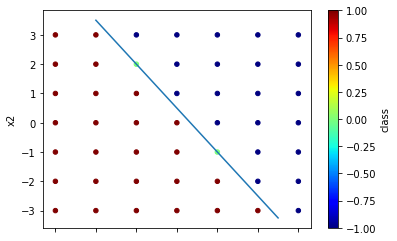

In [23]:
df.plot.scatter(x='x1', y='x2', c='class', cmap='jet', sharex=True) #try cmap = 'copper' or 'autumn'
plt.plot([-2,2.5],[3.5,-3.25])

# Exercise 2: finding a separating hyperplane in 2D

The file ex2data.csv in the folder data contains information about 2-dimensional data points and their classes. 
1. Plot the data.
2. Is the data linearly separable? 
3. If so, find the equation of a separating hyperplane

# Solution to Exercise 2

In [ ]:
# load data
#df = pd.read_csv('data/ex2data.csv')
df = pd.read_csv('ex2data.csv')
df.shape

In [25]:
df.head()

,X1,X2,class
0,-2.157363,-2.326500,False
1,1.277354,-2.745816,False
2,1.982858,-1.633554,True
3,-2.652544,-0.319240,False
4,-1.251667,2.021942,False


In [5]:
df['c']=df['class'].apply(lambda c:int(c)*2-1) #  add one column with name 'C' and content the same as column 'class' and replace element c in the column with int(c)*2-1
# https://www.itread01.com/content/1548122409.html  for apply and lambda
df.head()

,X1,X2,class,c
0,-2.157363,-2.326500,False,-1
1,1.277354,-2.745816,False,-1
2,1.982858,-1.633554,True,1
3,-2.652544,-0.319240,False,-1
4,-1.251667,2.021942,False,-1


# Solution to Exercise 2 - cont.

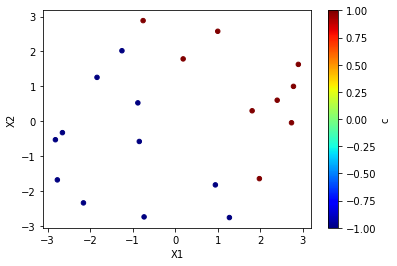

In [6]:
df.plot.scatter(x='X1', y='X2', c='c', cmap='jet', sharex=False)
#try  df.plot.scatter(x='X1', y='X2', c='c', cmap='prism', sharex=False) or 'flag' or 'hot' or 'grey'

# Solution to Exercise 2 - cont.

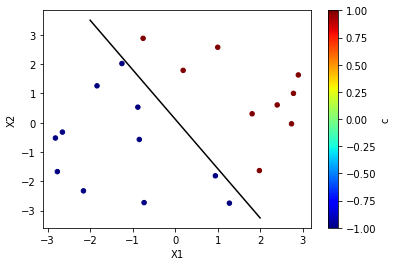

In [7]:
# plot the line passing through (-2,3.5) and (2,-3.25)
df.plot.scatter(x='X1', y='X2', c='c', cmap='jet', sharex=False)
plt.plot([-2,2],[3.5,-3.25],'-k')

Equation of a line in 2D-space: β0 + β1x1 + β2x2 = 0

In [8]:
# solution of a system of equations to find a hyperplane passing through(-2,3.5) and (2,-3.25)
beta0=1
A = [[-2,3.5],[2,-3.25]]
b = [-1, -1]
beta1, beta2 = np.linalg.solve(A,b).tolist()
print('Separating hyperplane coefficients:',beta0,beta1,beta2)

Separating hyperplane coefficients: 1 -13.5 -8.0


# Exercise 3: Computing the maximal margin separating hyperplane*

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

\* approximately, when the data is linearily separable

In [9]:
df.shape

(20, 4)

In [10]:
df.head(3)
# try df.head(20)

,X1,X2,class,c
0,-2.157363,-2.326500,False,-1
1,1.277354,-2.745816,False,-1
2,1.982858,-1.633554,True,1


In [11]:
from sklearn import svm
clf = svm.SVC(kernel='linear',C=10**10)
clf.fit(df[['X1','X2']], df['class'])   #try clf.fit(df[['X1','X2']], df['c'])

SVC(C=10000000000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

# Exercise 3: Computing the maximal margin separating hyperplane - cont.

In [12]:
# classify new points
clf.predict([[3., 3.] , [-3., -3.]])

array([ True, False])

In [13]:
# print beta (the hyperplane coefficents) and the support vectors
beta1,beta2 = clf.coef_[0]
beta0 = clf.intercept_[0]
M = 1/np.sqrt(beta1**2 + beta2**2) #M = 1/||β||
print('beta0=%6.2f \nbeta1=%6.2f \nbeta2=%6.2f'%(beta0,beta1,beta2))
print('Margin:', M)
print('support vectors indexes:', clf.support_)

beta0= -0.95 
beta1=  1.96 
beta2=  1.19
Margin: 0.43619727598012464
support vectors indexes: [ 4  2 11]


# Exercise 3: Computing the maximal margin separating hyperplane - cont.

In [14]:
clf.support_vectors_[:,0] #show the first components of support vectors

array([-1.25166708,  1.98285807, -0.7535161 ])

In [15]:
clf.support_vectors_[:,1] #show the second components of support vectors

array([ 2.02194219, -1.63355404,  2.88279875])

In [16]:
df.iloc[clf.support_,:] #show information of support vectors in the data frame
#https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/462517/
#try df.iloc[:,:]
#df.iloc[0:2,:]

,X1,X2,class,c
4,-1.251667,2.021942,False,-1
2,1.982858,-1.633554,True,1
11,-0.753516,2.882799,True,1


(-3, 4)

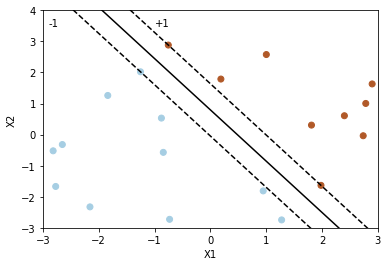

In [17]:
# plot hyperplane, margins and support vectors
fig, ax = plt.subplots()
ax.scatter(df['X1'], df['X2'], c=df['class'], cmap=plt.cm.Paired)
X1_range = [-3,3]
X2_hyperplane = list(map(lambda x1:(-beta0-beta1*x1)/beta2, X1_range))
#X2 =( -β0 –β1X1 )/β2
X2_margin1 = list(map(lambda x1:(-beta0-M*np.sqrt(beta1**2+beta2**2)-beta1*x1)/beta2, X1_range))
#try X2_margin1 = list(map(lambda x1:(-beta0-1-beta1*x1)/beta2, X1_range))
X2_margin2 = list(map(lambda x1:(-beta0+M*np.sqrt(beta1**2+beta2**2)-beta1*x1)/beta2, X1_range))
ax.plot(X1_range,X2_hyperplane,'-k')
ax.plot(X1_range,X2_margin1,'--k')
# try ax.plot(X1_range,X2_margin1,'-.c')
ax.plot(X1_range,X2_margin2,'--k')
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=80, facecolors='none')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.text(-1, 3.5, '+1')
ax.text(-2.9, 3.5, '-1')
ax.set_xlim([-3,3])
ax.set_ylim([-3,4])    

# Drawing dicision boundary

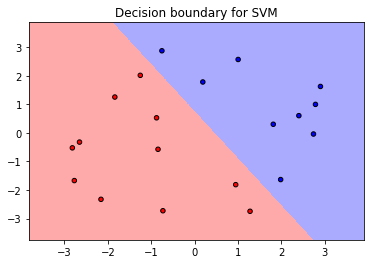

In [18]:
X = df[['X1','X2']] # use only two features for prediction
Y = df['class']
from tools import * # the file tools.py contains the function 
plot_decision_boundary_2d(df=X, Y=Y, clf=clf, title='Decision boundary for SVM')

In [19]:
from mlxtend.plotting import plot_decision_regions 
plot_decision_regions(X, y, clf=clf, legend=2)
#plot_decision_boundary_2d(df=X, Y=Y, clf=clf, title='Decision boundary for SVM')

ModuleNotFoundError: No module named 'mlxtend'

https://www.kaggle.com/arthurtok/decision-boundaries-visualised-via-python-plotly
    

https://www.twblogs.net/a/5b82f6852b717766a1ea89f5
    

https://blog.csdn.net/weixin_40604987/article/details/79566459
    

In [ ]:
#decision line
https://www.twblogs.net/a/5b8a6a822b71775d1ce6e6f4